### To determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

In [1]:
#Importing all the necessarylibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df_train=pd.read_csv("train_agriculture.csv")
df_train["source"]="train"
df_test=pd.read_excel("test_agriculture.xlsx")
df_test["source"]="test"
df=df_train
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1,train
2,F00000004,257,1,0,1,0,0.0,0,2,1,train
3,F00000005,257,1,1,1,0,0.0,0,2,1,train
4,F00000006,342,1,0,1,0,0.0,0,2,1,train


In [3]:
for i in df.columns:
    a=df[i].unique()
    len(a)
    print(i,len(a))
    if len(a)<5:
        print(a)

ID 88858
Estimated_Insects_Count 71
Crop_Type 2
[1 0]
Soil_Type 2
[0 1]
Pesticide_Use_Category 3
[1 3 2]
Number_Doses_Week 20
Number_Weeks_Used 65
Number_Weeks_Quit 51
Season 3
[1 2 3]
Crop_Damage 3
[0 1 2]
source 1
['train']


In [4]:
df.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
source                         1
dtype: int64

In [5]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'source'],
      dtype='object')

In [6]:
df.shape

(88858, 11)

In [7]:
#Check for Null Values
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
source                        0
dtype: int64

Observation:
    
    1. Number_Weeks_Used has 9000  missing data.

In [8]:
#Replacing missing values with mode of the data .
df["Number_Weeks_Used"].fillna(df["Number_Weeks_Used"].mean(),inplace=True)

In [9]:
# Again Checking for Null Values
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
source                     0
dtype: int64

Observation:
    
    Clearly ,there are no null values present in the dataset.

In [10]:
df_test.shape

(1199, 10)

In [12]:
#Checking Datatypes 
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
source                      object
dtype: object

Observation:

    1.ID column is in object datatype.
    
    2.Rest all columns are in int64 datatype except Number_Weeks_Used column.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        88858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
 10  source                   88858 non-null  object 
dtypes: float64(1), int64(8), object(2)
memory usage: 7.5+ MB


<AxesSubplot:>

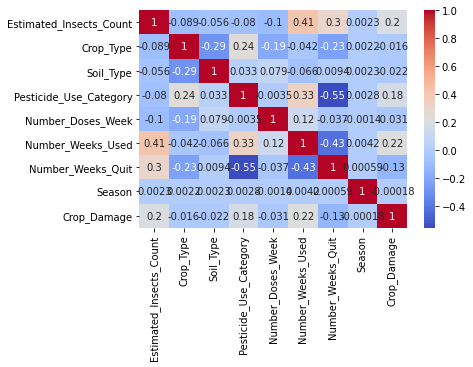

In [15]:
#Checking Correlation using heatmap
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

Observation:

    1.Estimated_Insects_count,Pesticide_use_category and Number_weeks_used are positively correlated with Crop damage.
    
    2.Number_weeks_used  is positively correlated with Estimated_Insects_count and Pesticide_use_category. 
    
    3.Number_weeks_Quit is highly negatively correlated with Pesticide_use_category and Number_weeks_used.

## Univariate Analysis

<Figure size 864x360 with 0 Axes>

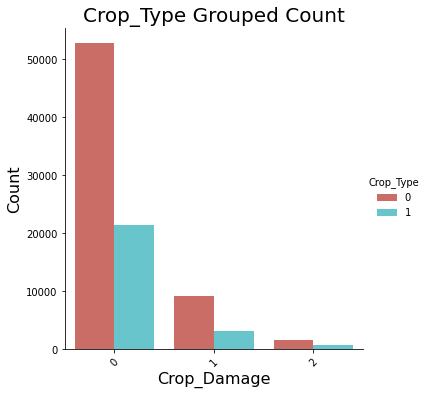

In [16]:
plt.figure(figsize=(12,5))
sns.catplot(x="Crop_Damage",data=df,palette="hls",kind="count",hue="Crop_Type")
plt.xlabel("Crop_Damage",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Crop_Type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show();

Observations:
    
    1. Crop damage due to pesticides are less in comparison to damage due to other causes.
    2. Crop type 0 has higher chance of survival compared to crop type 1.

<Figure size 864x360 with 0 Axes>

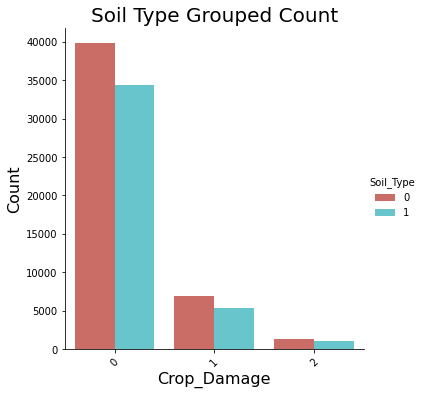

In [17]:
plt.figure(figsize=(12,5))
sns.catplot(x="Crop_Damage",data=df,palette="hls",kind="count",hue="Soil_Type")
plt.xlabel("Crop_Damage",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Soil Type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show();

<Figure size 864x360 with 0 Axes>

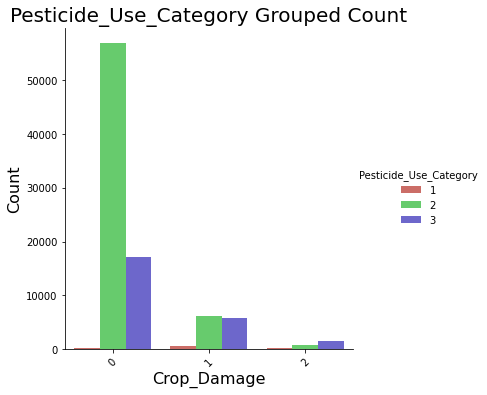

In [19]:

plt.figure(figsize=(12,5))
sns.catplot(x="Crop_Damage",data=df,palette="hls",kind="count",hue="Pesticide_Use_Category")
plt.xlabel("Crop_Damage",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Pesticide_Use_Category Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show();

<Figure size 864x360 with 0 Axes>

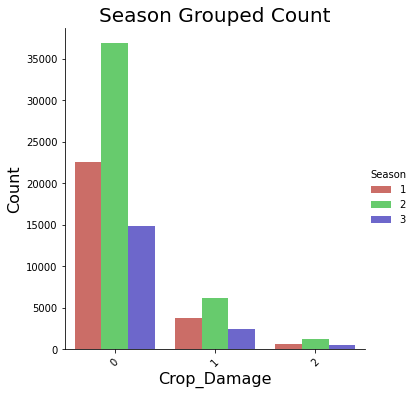

In [20]:
plt.figure(figsize=(12,5))
sns.catplot(x="Crop_Damage",data=df,palette="hls",kind="count",hue="Season")
plt.xlabel("Crop_Damage",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Season Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show();

Text(0.5, 1.0, 'Crop Damage Type 3 vs Pesticide Use Category')

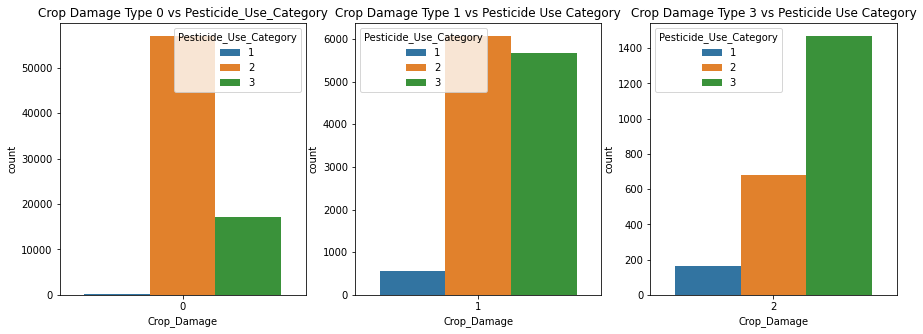

In [23]:
fig,[ax1,ax2,ax3]=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=sns.countplot(x="Crop_Damage",hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==0],ax=ax1)
ax1.set_title("Crop Damage Type 0 vs Pesticide_Use_Category")
ax2=sns.countplot(x="Crop_Damage",hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==1],ax=ax2)
ax2.set_title("Crop Damage Type 1 vs Pesticide Use Category")
ax3=sns.countplot(x="Crop_Damage",hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==2],ax=ax3)
ax3.set_title("Crop Damage Type 2 vs Pesticide Use Category")

##### Observations: 
1. Type 2 pesticide is much safer to use as compared to Type 3 pesticide. 
2. Type 3 pesticide shows most pesticide related damage to crops. 

<Figure size 864x360 with 0 Axes>

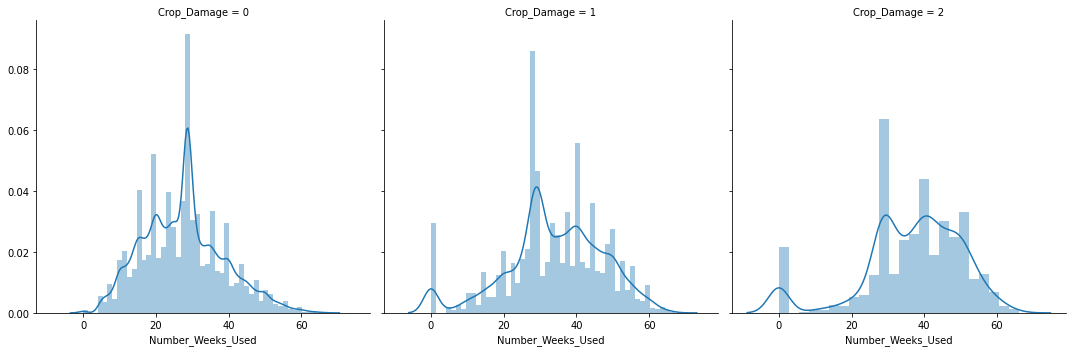

In [24]:
plt.figure(figsize=(12,5))
g=sns.FacetGrid(df,col="Crop_Damage",size=5)
g=g.map(sns.distplot,"Number_Weeks_Used")
plt.show();

##### Observations: 
1. From Graph 1 we can conclude that till 20-25 weeks damage due to pesticide is negligible. 
2. From Graph 3 we can see that after 20 weeks damage due to use of pesticide increrases significantly. 

## Bivariate Analysis

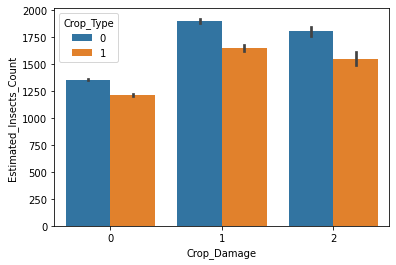

In [25]:
sns.barplot(x="Crop_Damage",y="Estimated_Insects_Count",hue="Crop_Type",data=df);

##### Observations: 
1. Clearly observed that Most insect attacks are done on crop type 0.

<Figure size 864x360 with 0 Axes>

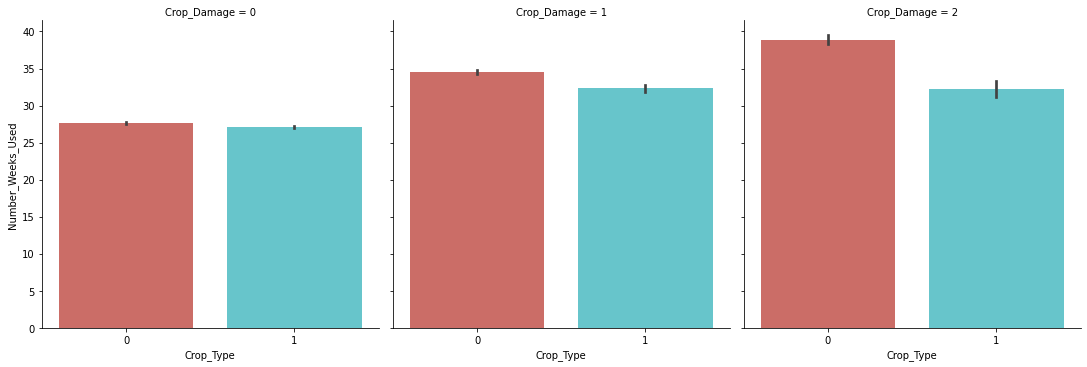

In [27]:
plt.figure(figsize=(12,5))
sns.catplot(x="Crop_Type",y="Number_Weeks_Used",data=df,palette="hls",kind="bar",col="Crop_Damage")
# plt.xticks(rotation=45)
plt.show();

##### Observations:
1. Crop Type 0 is more vulnerable to pesticide related and other damages as compared to Type1
2. Avg. duration of pesticide related damage is lower for Crop type 1. 